In [1]:
# Basic Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import *
from statistics import mean
from scipy.stats import bootstrap

In [3]:
# Reading and Understanding the Data and Data Pre-Processing

In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
data.shape

(1338, 7)

In [7]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

In [8]:
data['sex'] = le1.fit_transform(data['sex'])
data['smoker'] = le2.fit_transform(data['smoker'])
data['region'] = le3.fit_transform(data['region'])

In [9]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [12]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [14]:
data['sex'].unique()

array([0, 1])

In [15]:
data['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [16]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [17]:
data['smoker'].unique()

array([1, 0])

In [18]:
data['region'].unique()

array([3, 2, 1, 0])

In [19]:
data['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [20]:
# Treatment of Outliers

In [21]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(data)
mask = yhat != -1
data = data[mask]

In [22]:
data.shape

(1318, 7)

In [23]:
# Now we will perform inverse_transform for visual plots to convert them back to string.

In [24]:
data['sex'] = le1.inverse_transform(data['sex'])

In [25]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,3,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,1,10600.54830
1334,18,female,31.920,0,0,0,2205.98080
1335,18,female,36.850,0,0,2,1629.83350
1336,21,female,25.800,0,0,3,2007.94500


In [26]:
data['smoker'] = le2.inverse_transform(data['smoker'])

In [27]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,1,10600.54830
1334,18,female,31.920,0,no,0,2205.98080
1335,18,female,36.850,0,no,2,1629.83350
1336,21,female,25.800,0,no,3,2007.94500


In [28]:
data['region'] = le3.inverse_transform(data['region'])

In [29]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
# Univariate Analysis

C:\Users\JASWANTH PULIPATI\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


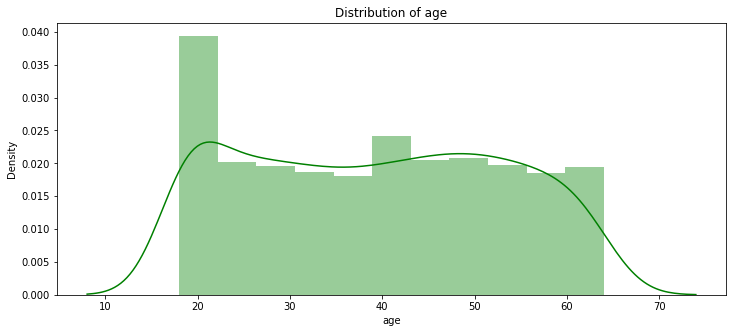

In [31]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

C:\Users\JASWANTH PULIPATI\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


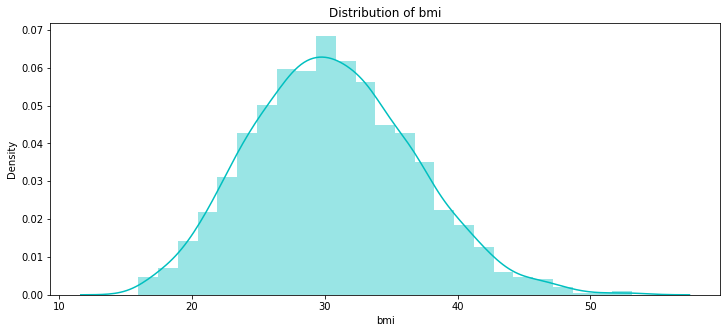

In [32]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'c')

C:\Users\JASWANTH PULIPATI\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


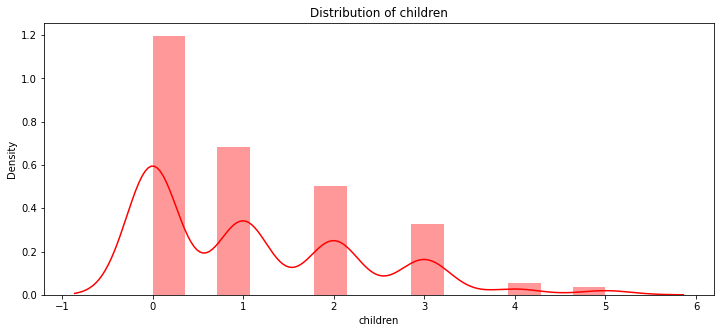

In [33]:
plt.figure(figsize=(12,5))
plt.title("Distribution of children")
ax = sns.distplot(data["children"], color = 'r')

C:\Users\JASWANTH PULIPATI\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


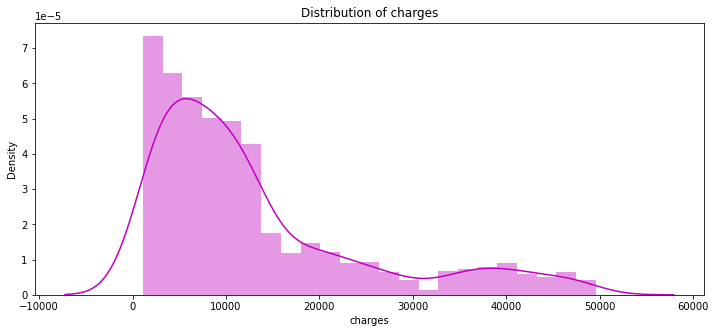

In [34]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges")
ax = sns.distplot(data["charges"], color = 'm')

In [35]:
#Bivariate Analysis
#Taking charges as target variable (y) and remaining all as feature variables (x)

In [36]:
# 1. Heat Map

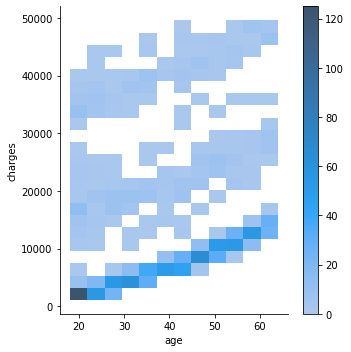

In [37]:
sns.displot(x="age", y="charges",data=data,cbar=True)

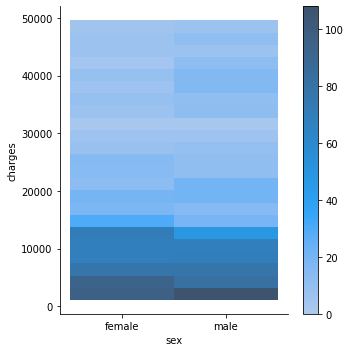

In [38]:
sns.displot(x="sex", y="charges",data=data,cbar=True)

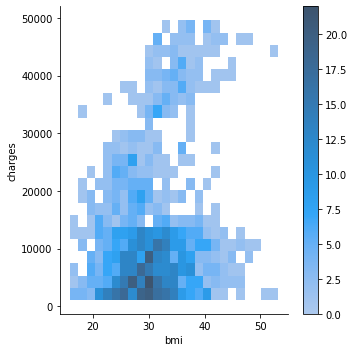

In [39]:
sns.displot(x="bmi", y="charges",data=data,cbar=True)

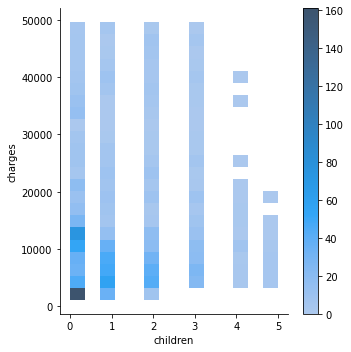

In [40]:
sns.displot(x="children", y="charges",data=data,cbar=True)

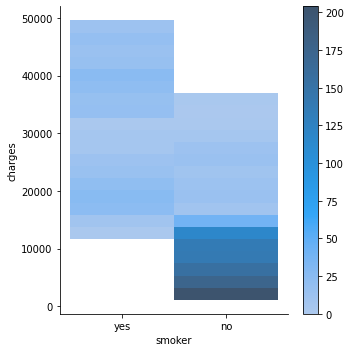

In [41]:
sns.displot(x="smoker", y="charges",data=data,cbar=True)

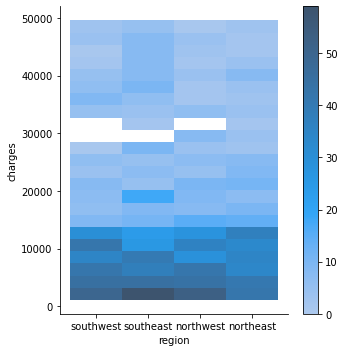

In [42]:
sns.displot(x="region", y="charges",data=data,cbar=True)

In [43]:
# 2.Scatter Plot

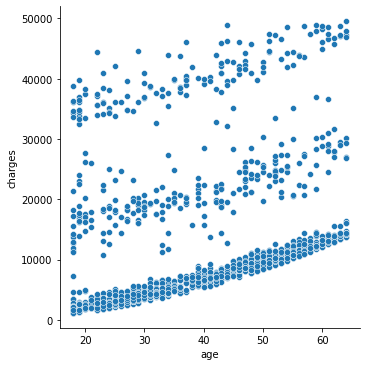

In [44]:
sns.relplot(x='age',y='charges',data=data)

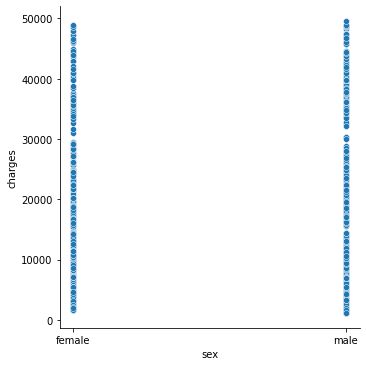

In [45]:
sns.relplot(x='sex',y='charges',data=data)

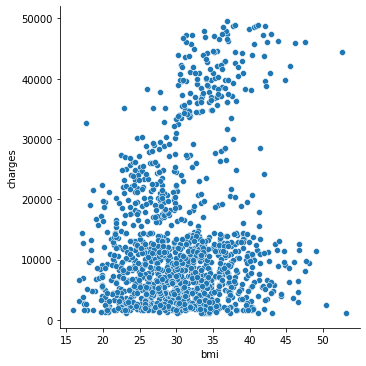

In [46]:
sns.relplot(x='bmi',y='charges',data=data)

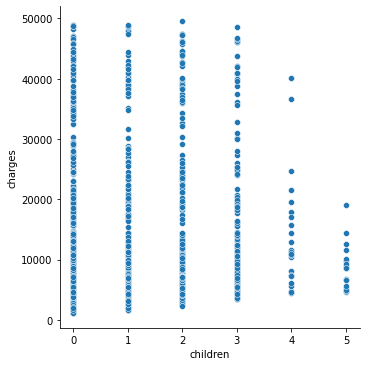

In [47]:
sns.relplot(x='children',y='charges',data=data)

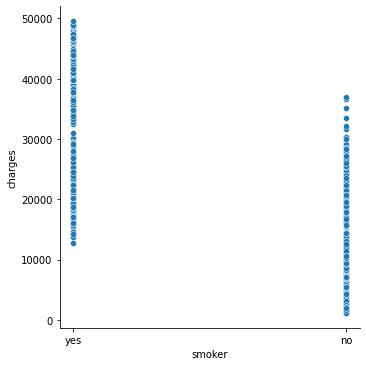

In [48]:
sns.relplot(x='smoker',y='charges',data=data)

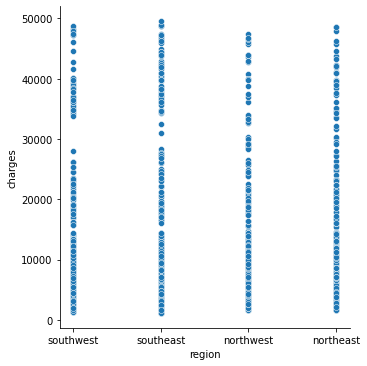

In [49]:
sns.relplot(x='region',y='charges',data=data)

In [50]:
# 3.Hex plot

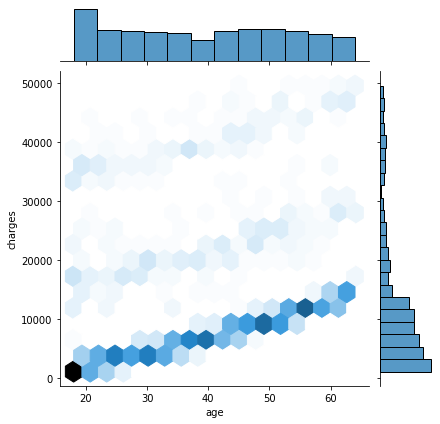

In [51]:
sns.jointplot(x='age', y='charges', kind="hex",data=data)

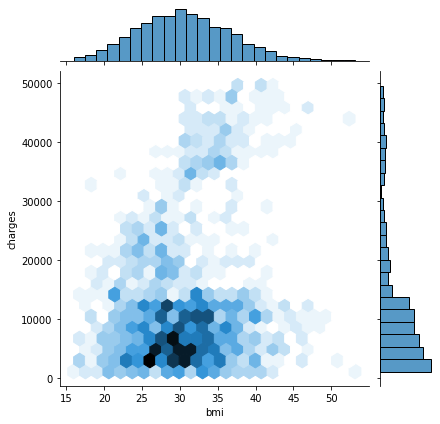

In [52]:
sns.jointplot(x='bmi', y='charges', kind="hex",data=data)

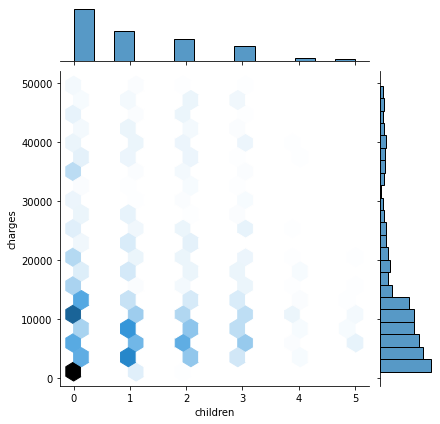

In [53]:
sns.jointplot(x='children', y='charges', kind="hex",data=data)

In [54]:
# 4.Box plot

<AxesSubplot:xlabel='sex', ylabel='charges'>

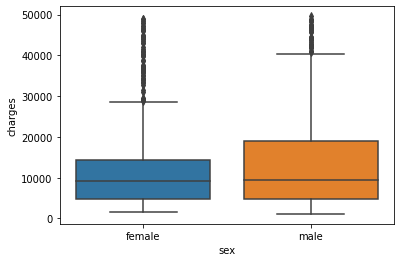

In [56]:
sns.boxplot(x="sex", y="charges", data=data)

<AxesSubplot:xlabel='children', ylabel='charges'>

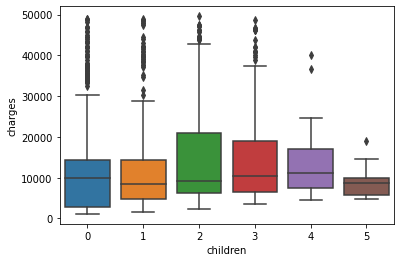

In [58]:
sns.boxplot(x="children", y="charges", data=data)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

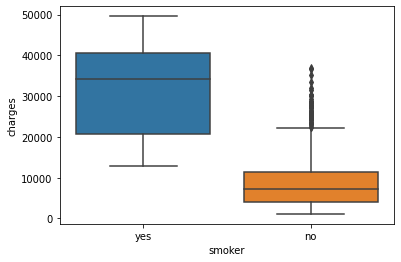

In [59]:
sns.boxplot(x="smoker", y="charges", data=data)

<AxesSubplot:xlabel='region', ylabel='charges'>

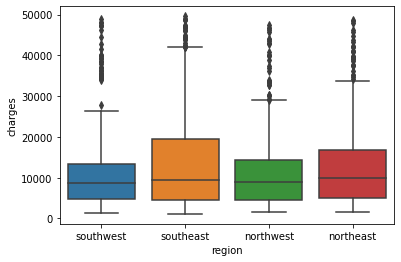

In [60]:
sns.boxplot(x="region", y="charges", data=data)

In [61]:
# 5.Violin plot

<AxesSubplot:xlabel='sex', ylabel='charges'>

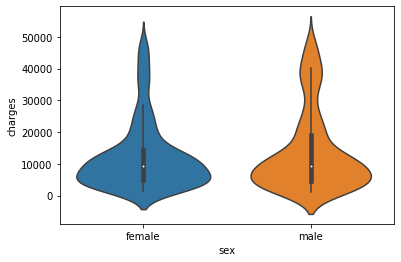

In [63]:
sns.violinplot(x="sex", y="charges", data=data)

<AxesSubplot:xlabel='children', ylabel='charges'>

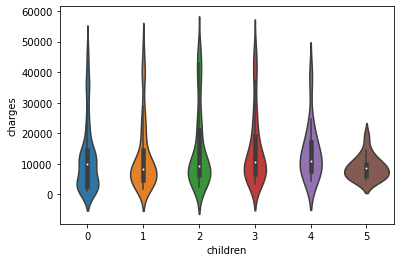

In [65]:
sns.violinplot(x="children", y="charges", data=data)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

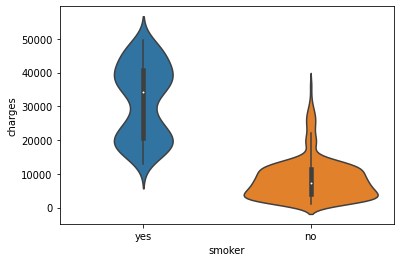

In [66]:
sns.violinplot(x="smoker", y="charges", data=data)

<AxesSubplot:xlabel='region', ylabel='charges'>

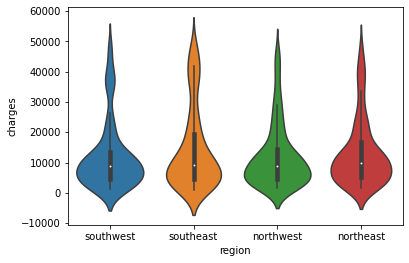

In [67]:
sns.violinplot(x="region", y="charges", data=data)

In [68]:
#6. Strip plot

<AxesSubplot:xlabel='sex', ylabel='charges'>

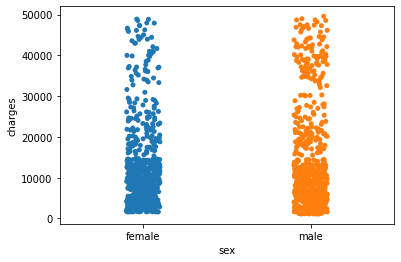

In [70]:
sns.stripplot(x = 'sex', y = 'charges', data = data)

<AxesSubplot:xlabel='children', ylabel='charges'>

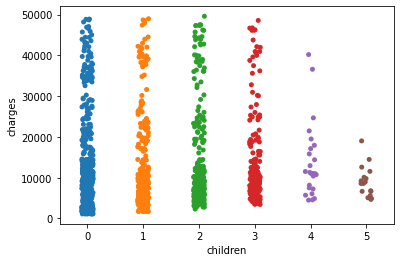

In [72]:
sns.stripplot(x = 'children', y = 'charges', data = data)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

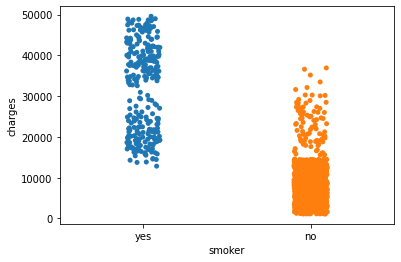

In [73]:
sns.stripplot(x = 'smoker', y = 'charges', data = data)

<AxesSubplot:xlabel='region', ylabel='charges'>

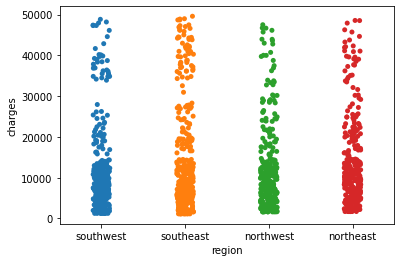

In [74]:
sns.stripplot(x = 'region', y = 'charges', data = data)

In [75]:
#Multivariate analysis

In [76]:
# 1.Correlation heat plot

<AxesSubplot:>

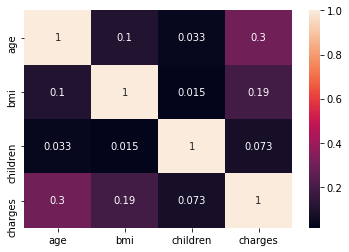

In [77]:
corelation=data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [80]:
# charges by region

C:\Users\JASWANTH PULIPATI\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


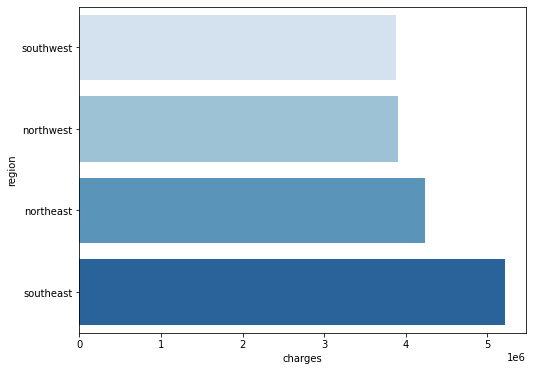

In [81]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

In [82]:
# So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. 

In [83]:
# Taking into account certain factors (sex, smoking, having children) let's see how it changes by region -
# Factor = 'sex'

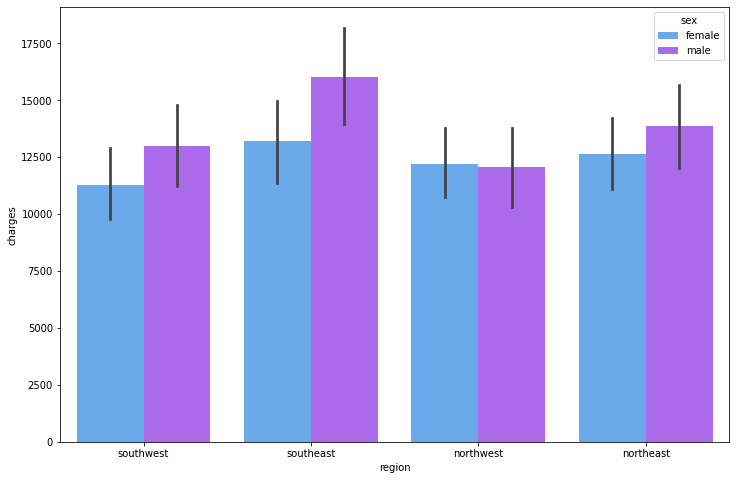

In [84]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='cool')

In [85]:
# Factor = 'smoker'

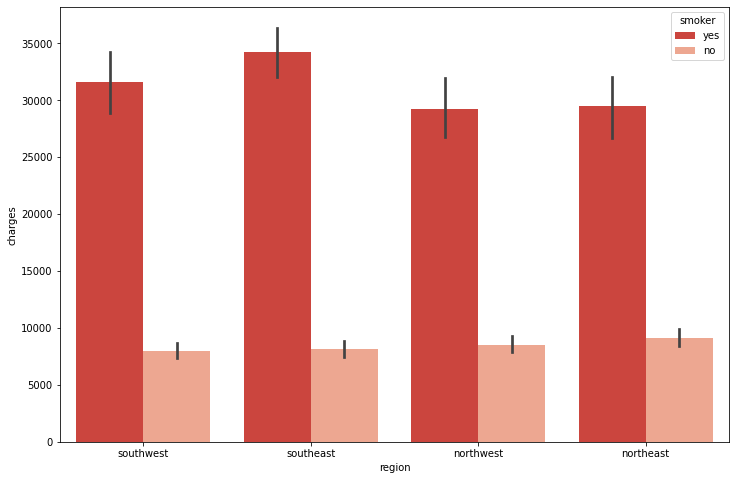

In [86]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=data, palette='Reds_r')

In [87]:
# Factor = 'children'

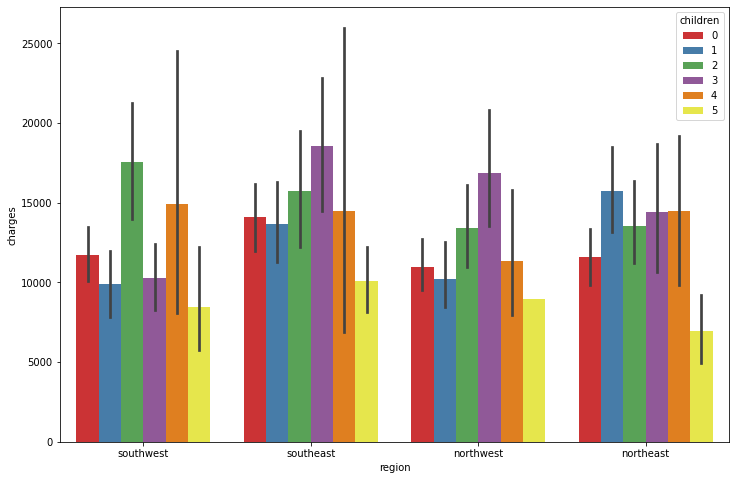

In [88]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=data, palette='Set1')

In [89]:
# As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast.
# People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender 
# than in the Southwest and Northwest overall. 
# And people with children tend to have higher medical costs overall as well.

In [90]:
# Now let's analyze the medical charges by age, bmi and children according to the smoking factor

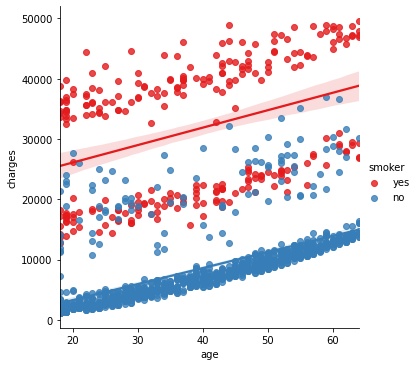

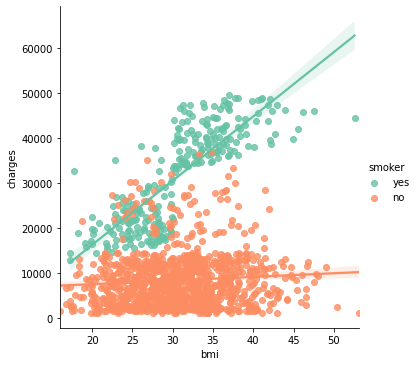

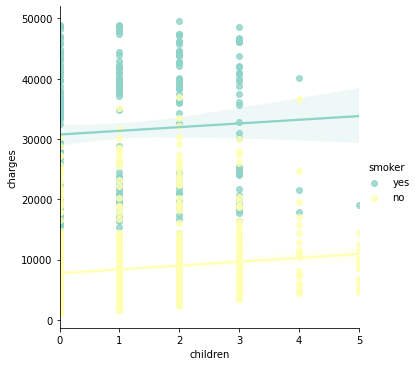

In [91]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set3')

In [92]:
# Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. 
# Also people who have children generally smoke less.

In [93]:
# Again, we will be using LabelEncoder() inorder to convert them back to numerics

In [94]:
data['sex'] = le1.fit_transform(data['sex'])
data['smoker'] = le2.fit_transform(data['smoker'])
data['region'] = le3.fit_transform(data['region'])

In [95]:
# Now after applying LabelEncoder we will now do the train_test_split on the data

In [97]:
from sklearn.model_selection import train_test_split as holdout
from sklearn import metrics

x = data.drop(['charges'], axis = 1)
y = data['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [98]:
# Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = data.drop(['charges'], axis=1)
y = data.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1, oob_score=True)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

print('OOB score:', Rfr.oob_score_)

MSE train data: 3236350.821, MSE test data: 23001389.717
R2 train data: 0.975, R2 test data: 0.812
OOB score: 0.8376630757921818


C:\Users\JASWANTH PULIPATI\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=1278    22462.04375
50       2211.13075
593     15359.10450
816      2842.76075
557      3935.17990
           ...     
773     17748.50620
848      2974.12600
1234     8515.75870
568     11552.90400
694      3577.99900
Name: charges, Length: 1054, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\JASWANTH PULIPATI\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=667     40003.33225
412     14455.64405
1073    12096.65120
205      4337.73520
1203     9964.06000
           ...     
1197     5699.83750
196      5649.71500
243      7196.86700
1170    17178.68240
1308    33900.65300
Name: charges, Length: 264, dtype: float64 as keyword args. From version 1.0 (renaming of 0

In [100]:
# Feature Importance Ranking

Feature importance ranking


1.smoker(0.628962)
2.bmi(0.195371)
3.age(0.133038)
4.children(0.021136)
5.region(0.014632)
6.sex(0.006862)


<BarContainer object of 6 artists>

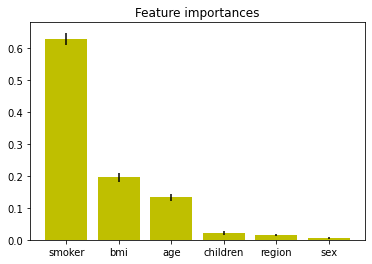

In [101]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [102]:
# Using machine learning models for predicting charges. We will be using different regression models to get accurate predictions

In [103]:
# 1 Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-10737.349581180844
[  248.93819365    81.64928972   304.75124515   515.98877006
 23353.0665509   -419.94573573]
0.729611397171023


In [105]:
# Cross validation for linear regression 
scores=cross_val_score(Lin_reg,x,y,cv=10,scoring='r2')
print('R_square score for Cross Validation:',mean(scores))

R_square score for Cross Validation: 0.7481927885694074


In [106]:
# Kfold cross validation for Linear regression
cv=KFold(n_splits=10,random_state=1,shuffle=True)
scores=cross_val_score(Lin_reg,x,y,cv=cv,scoring='r2')
print('R_square score for K- Fold cross Validation :',mean(scores))

R_square score for K- Fold cross Validation : 0.7480921370339916


In [107]:
# 2:- Ridge regression 

In [108]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=1)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print('Training score:',round(Ridge.score(x_train,y_train),2))
print('Testing score:',round(Ridge.score(x_test, y_test),2))

-10713.000901952126
[  248.94601291    87.52880069   304.75192595   514.9748104
 23211.51669009  -419.3926356 ]
Training score: 0.76
Testing score: 0.73


In [109]:
# Training score and testing score is almost similar. We will try to improve it by increasing the regularisation value

In [110]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5)
ridge.fit(x_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)
print('Training score:',round(ridge.score(x_train,y_train),2))
print('Testing score:',round(ridge.score(x_test, y_test),2))

-10618.284522363947
[  248.97591938   109.88553605   304.75536859   511.01568398
 22662.10072443  -417.21384366]
Training score: 0.76
Testing score: 0.73


In [111]:
# Since we got the same one we will increase the reguralisation and see

In [112]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)
print('Training score:',round(ridge.score(x_train,y_train),2))
print('Testing score:',round(ridge.score(x_test, y_test),2))

-10505.581957847762
[  249.01043169   135.40633345   304.76100823   506.27191745
 22010.91685004  -414.56210236]
Training score: 0.76
Testing score: 0.73


In [113]:
# Again we got same  

In [114]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=15)
ridge.fit(x_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)
print('Training score:',round(ridge.score(x_train,y_train),2))
print('Testing score:',round(ridge.score(x_test, y_test),2))

-10398.728769571046
[  249.04205473   158.49711074   304.76774693   501.73835152
 21396.17178767  -411.98456506]
Training score: 0.75
Testing score: 0.73


In [115]:
# As we can see there is a slight dip in training score

In [116]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=20)
ridge.fit(x_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)
print('Training score:',round(ridge.score(x_train,y_train),2))
print('Testing score:',round(ridge.score(x_test, y_test),2))

-10297.266320293222
[  249.07107339   179.40822811   304.77523439   497.39797706
 20814.88703046  -409.47593021]
Training score: 0.75
Testing score: 0.73


In [117]:
# Same as previous cell 

In [118]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=25)
ridge.fit(x_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)
print('Training score:',round(ridge.score(x_train,y_train),2))
print('Testing score:',round(ridge.score(x_test, y_test),2))

-10200.783345636295
[  249.09773886   198.35996606   304.78317647   493.23561199
 20264.40029131  -407.03145508]
Training score: 0.75
Testing score: 0.72


In [119]:
# Same as previous cell with minor difference

In [120]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=30)
ridge.fit(x_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)
print('Training score:',round(ridge.score(x_train,y_train),2))
print('Testing score:',round(ridge.score(x_test, y_test),2))

-10108.90993708269
[  249.12227327   215.54670659   304.79132631   489.23766276
 19742.32460545  -404.64688295]
Training score: 0.74
Testing score: 0.72


In [121]:
# Cross validation for ridge regression
ridge = Ridge(alpha=10)
scores=cross_val_score(ridge,x,y,cv=10,scoring='r2')
print('R_square score for Cross Validation:',mean(scores))

R_square score for Cross Validation: 0.7466306935656075


In [122]:
# K Fold cross validation for ridge regression
cv=KFold(n_splits=10,random_state=1,shuffle=True)
scores=cross_val_score(ridge,x,y,cv=cv,scoring='r2')
print('R_square score for K- Fold cross Validation :',mean(scores))

R_square score for K- Fold cross Validation : 0.7464522559099886


In [123]:
# Same as previous one 

In [124]:
# Conclusion
# If we try to increase penalty there is a slight variation in training score and testing score. If we try to increase it further
# the scores are getting reduced. We will try another model and see if the score improves

In [125]:
# 3 :- Lasso regression 

In [126]:
from sklearn.linear_model import Lasso

In [127]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=1, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print('Training score:',round(Lasso.score(x_train,y_train),2))
print('Testing score:',round(Lasso.score(x_test, y_test),2))

-10733.896428125778
[  248.93492358    77.96686204   304.7240536    515.30289061
 23346.87974449  -419.04855548]
Training score: 0.76
Testing score: 0.73


In [128]:
# As we can see the scores are not having much variation . We will try to increase l1 penalty and see

In [129]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=42, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print('Training score:',round(Lasso.score(x_train,y_train),2))
print('Testing score:',round(Lasso.score(x_test, y_test),2))

-10719.95280018867
[  248.91732436    63.17797037   304.61776349   512.56286153
 23322.13726828  -415.4620054 ]
Training score: 0.76
Testing score: 0.73


In [130]:
# As we can see there is no change in the score

In [131]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=10, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=1, selection='random')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print('Training score:',round(Lasso.score(x_train,y_train),2))
print('Testing score:',round(Lasso.score(x_test, y_test),2))

-10700.73500436975
[  248.89015607    44.60851565   304.55832914   509.18606543
 23291.23545167  -413.52624165]
Training score: 0.76
Testing score: 0.73


In [132]:
# As we can see there is no change in the scores

In [133]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=15, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=1, selection='random')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print('Training score:',round(Lasso.score(x_train,y_train),2))
print('Testing score:',round(Lasso.score(x_test, y_test),2))

-10683.335998935867
[  248.86824569    26.1270562    304.42412604   505.76018054
 23260.30704356  -408.99890946]
Training score: 0.76
Testing score: 0.73


In [134]:
# As we can see there is no change in the scores

In [135]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=20, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=1, selection='random')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print('Training score:',round(Lasso.score(x_train,y_train),2))
print('Testing score:',round(Lasso.score(x_test, y_test),2))

-10665.93699350198
[ 2.48846335e+02  7.64559675e+00  3.04289923e+02  5.02334296e+02
  2.32293786e+04 -4.04471577e+02]
Training score: 0.76
Testing score: 0.73


In [136]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=25, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=1, selection='random')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print('Training score:',round(Lasso.score(x_train,y_train),2))
print('Testing score:',round(Lasso.score(x_test, y_test),2))

-10652.490304001703
[  248.83515405     0.           304.0972394    498.83082614
 23197.69618818  -399.94424508]
Training score: 0.76
Testing score: 0.73


In [137]:
# As we can see there is no change in the score

In [138]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=30, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=1, selection='random')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print('Training score:',round(Lasso.score(x_train,y_train),2))
print('Testing score:',round(Lasso.score(x_test, y_test),2))

-10641.839556498964
[  248.83152889     0.           303.86355949   495.27258738
 23165.4801199   -395.41691289]
Training score: 0.76
Testing score: 0.73


In [139]:
# Cross Validation for Lasso regression
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=30, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=1, selection='random')
scores=cross_val_score(Lasso,x,y,cv=10,scoring='r2')
print('R_square score for Cross Validation:',mean(scores))

R_square score for Cross Validation: 0.7482959977037553


In [140]:
# K Fold cross Validation for Lasso Regression
cv=KFold(n_splits=10,random_state=1,shuffle=True)
scores=cross_val_score(Lasso,x,y,cv=cv,scoring='r2')
print('R_square score for K- Fold cross Validation :',mean(scores))

R_square score for K- Fold cross Validation : 0.7481506335779491


In [141]:
# Conclusion 
# As we can there is a constant score when it comes to training and testing by taking different values of alpha.
# So we will explore another model and see whether there is any improvement in the score

In [142]:
# Polynomial regression 
from sklearn.preprocessing import PolynomialFeatures
x = data.drop(['charges', 'sex', 'region'], axis = 1)
y = data.charges

In [143]:
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5912.88603512661
[ 0.00000000e+00 -1.17396032e+02  6.26370495e+02  1.11113642e+03
 -9.00898057e+03  4.31905688e+00  1.11467949e+00  4.75719512e+00
 -1.39004881e+01 -1.03253930e+01 -9.38476710e+00  1.37636686e+03
 -8.00566253e+01 -2.47002618e+02 -9.00898057e+03]
0.8356067877734483


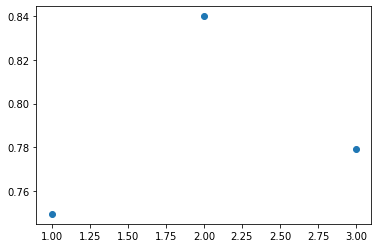

In [144]:
# cv=5
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x)
    poly = LinearRegression()
    return np.mean(cross_val_score(poly, X_poly, y, cv=5,scoring='r2'))
poly_cv = []
for i in range(1,4):
    poly_cv.append(create_polynomial_regression_model(i))
plt.scatter(range(1,4),poly_cv)

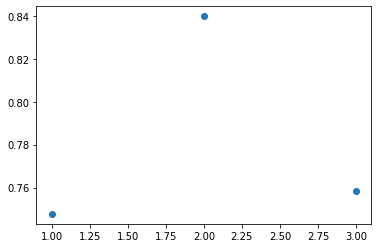

In [145]:
# cv=10
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x)
    poly = LinearRegression()
    return np.mean(cross_val_score(poly, X_poly, y, cv=10,scoring='r2'))
poly_cv = []
for i in range(1,4):
    poly_cv.append(create_polynomial_regression_model(i))
plt.scatter(range(1,4),poly_cv)

In [146]:
# Performing cross validation
scores=cross_val_score(Pol_reg,x_pol,y,cv=10,scoring='r2')
print('R_square score for Cross Validation:',mean(scores))

R_square score for Cross Validation: 0.839812681060619


In [147]:
# Kfold cross validation for Polynomial regression


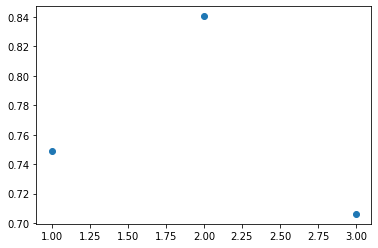

In [148]:
# n_splits=5
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x)
    poly = LinearRegression()
    cv=KFold(n_splits=5,random_state=1,shuffle=True)
    return np.mean(cross_val_score(poly, X_poly, y, cv=cv,scoring='r2'))
poly_cv = []
for i in range(1,4):
    poly_cv.append(create_polynomial_regression_model(i))
plt.scatter(range(1,4),poly_cv)

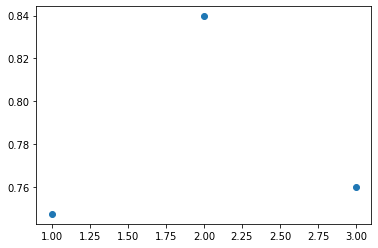

In [149]:
# n_splits=10
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x)
    poly = LinearRegression()
    cv=KFold(n_splits=10,random_state=1,shuffle=True)
    return np.mean(cross_val_score(poly, X_poly, y, cv=cv,scoring='r2'))
poly_cv = []
for i in range(1,4):
    poly_cv.append(create_polynomial_regression_model(i))
plt.scatter(range(1,4),poly_cv)

In [150]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
scores=cross_val_score(Pol_reg,x_pol,y,cv=cv,scoring='r2')
print('R_square score for K- Fold cross Validation :',mean(scores))

R_square score for K- Fold cross Validation : 0.8396537913354332


In [151]:
#Tabulating  Cross validation score of all the models for cv=10
from tabulate import tabulate

In [152]:
info={'Regression Models':['Linear Regression','Ridge Regression','Lasso Regression','Polynomial Regression'],
     'Cross Validation score':[0.748,0.746,0.748,0.839]}

In [153]:
print(tabulate(info, headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════╤══════════════════════════╕
│    │ Regression Models     │   Cross Validation score │
╞════╪═══════════════════════╪══════════════════════════╡
│  0 │ Linear Regression     │                    0.748 │
├────┼───────────────────────┼──────────────────────────┤
│  1 │ Ridge Regression      │                    0.746 │
├────┼───────────────────────┼──────────────────────────┤
│  2 │ Lasso Regression      │                    0.748 │
├────┼───────────────────────┼──────────────────────────┤
│  3 │ Polynomial Regression │                    0.839 │
╘════╧═══════════════════════╧══════════════════════════╛


In [154]:
# Tabulating  K Fold cross validation for all the models with n_splits=10


In [155]:
info={'Regression Models':['Linear Regression','Ridge Regression','Lasso Regression','Polynomial Regression'],
     'K Fold Cross Validation score':[0.748,0.746,0.748,0.839]}

In [156]:
print(tabulate(info, headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════╤═════════════════════════════════╕
│    │ Regression Models     │   K Fold Cross Validation score │
╞════╪═══════════════════════╪═════════════════════════════════╡
│  0 │ Linear Regression     │                           0.748 │
├────┼───────────────────────┼─────────────────────────────────┤
│  1 │ Ridge Regression      │                           0.746 │
├────┼───────────────────────┼─────────────────────────────────┤
│  2 │ Lasso Regression      │                           0.748 │
├────┼───────────────────────┼─────────────────────────────────┤
│  3 │ Polynomial Regression │                           0.839 │
╘════╧═══════════════════════╧═════════════════════════════════╛


In [157]:
# As we can see Polynomial Regression of degree 2 is having better r_square score after performing cross validation. So we can
# proceed with polynomial regression model to predict the charges

In [159]:
y_test_pred = Pol_reg.predict(x_test)
#Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': np.round(y_test,decimals=2), 'Predicted': np.round(y_test_pred,decimals=2)})
df

,Actual,Predicted
667,40003.33,34910.75
412,14455.64,8790.32
1073,12096.65,13431.86
205,4337.74,5458.43
1203,9964.06,11599.95
...,...,...
1197,5699.84,7459.95
196,5649.72,6940.33
243,7196.87,9310.12
1170,17178.68,23332.71


In [ ]:
# Conclusion
#we can see that predicted charges are high and the reason for that is many of them are smokers